In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
data_path = "train.csv"  
df = pd.read_csv(data_path)




In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)


sales_data = df.groupby('Order Date')['Sales'].sum().reset_index()


sales_data.set_index('Order Date', inplace=True)



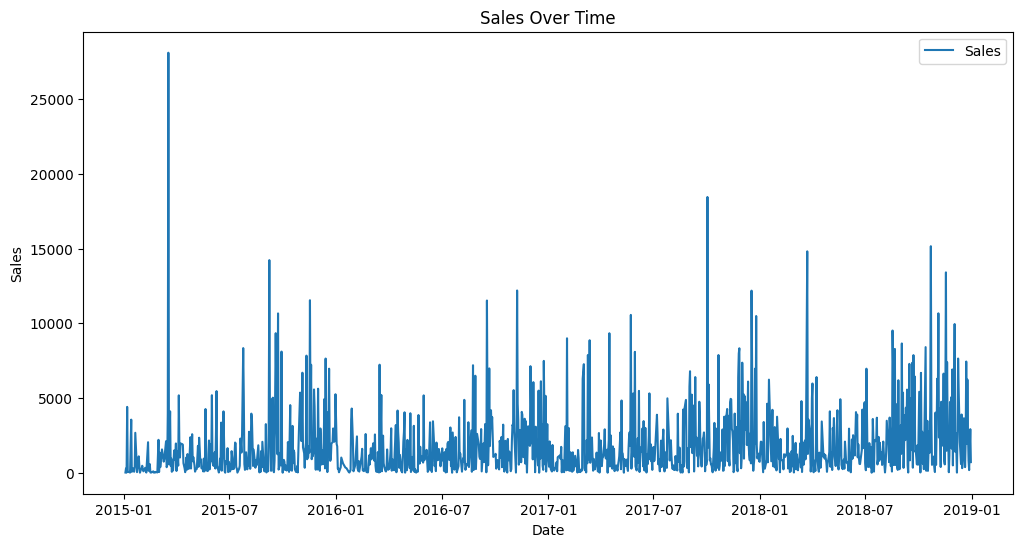

In [6]:

plt.figure(figsize=(12, 6))
plt.plot(sales_data, label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()



In [7]:
sales_data = sales_data.asfreq('D') 
sales_data = sales_data.fillna(method='ffill')

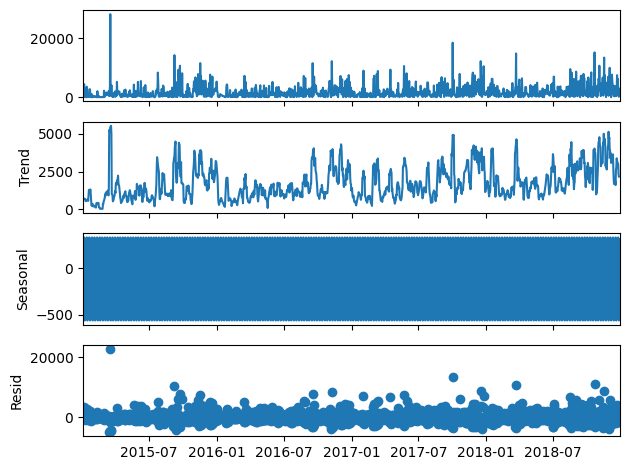

In [8]:
result = seasonal_decompose(sales_data, model='additive')
result.plot()
plt.show()

In [9]:
train_size = int(0.8 * len(sales_data))
train = sales_data[:train_size]
test = sales_data[train_size:]


In [10]:
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()


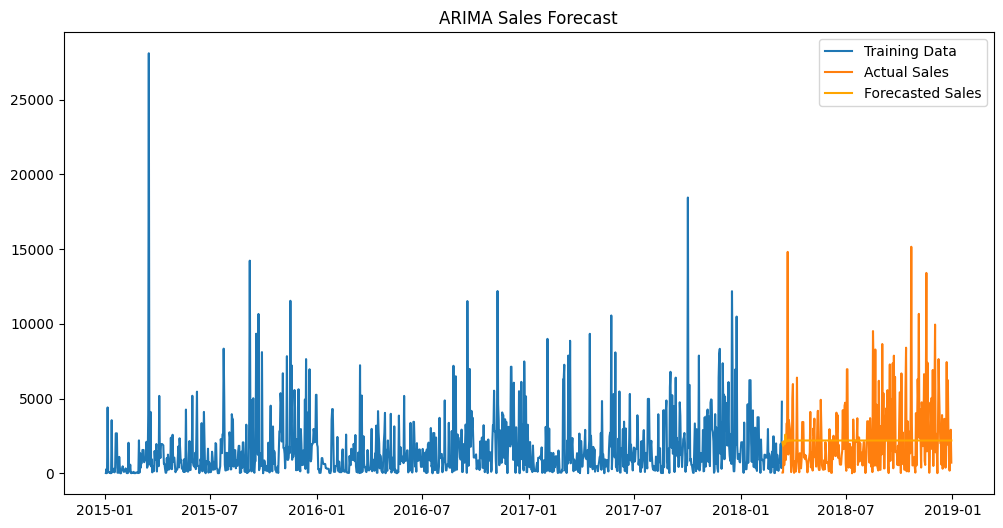

In [11]:
forecast = model_fit.forecast(steps=len(test))
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Sales')
plt.plot(test.index, forecast, label='Forecasted Sales', color='orange')
plt.legend()
plt.title('ARIMA Sales Forecast')
plt.show()


In [12]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 1773.6135703303496
Root Mean Square Error (RMSE): 2470.074039928904


In [13]:


print("Observations from the Time Series Analysis:")
print("1. Sales show clear seasonal trends.")
print("2. Holidays and specific months might influence sales peaks.")

Observations from the Time Series Analysis:
1. Sales show clear seasonal trends.
2. Holidays and specific months might influence sales peaks.


In [14]:
forecast_df = pd.DataFrame({'Actual Sales': test.values.flatten(), 'Forecasted Sales': forecast}, index=test.index)
print(forecast_df)


from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print("\nNumerical Insights:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Forecasted vs Actual Comparison
print("\nFirst 10 Forecasted vs Actual Sales Data:")
print(forecast_df.head(10))

            Actual Sales  Forecasted Sales
Order Date                                
2018-03-14       49.6160       2072.154203
2018-03-15       49.6160       1841.118355
2018-03-16     2014.3810       2036.818477
2018-03-17      542.7460       2162.251399
2018-03-18     1027.7580       1951.461241
...                  ...               ...
2018-12-26      814.5940       2195.827288
2018-12-27      177.6360       2195.827288
2018-12-28     1657.3508       2195.827288
2018-12-29     2915.5340       2195.827288
2018-12-30      713.7900       2195.827288

[292 rows x 2 columns]

Numerical Insights:
Mean Absolute Error (MAE): 1773.61
Root Mean Squared Error (RMSE): 2470.07

First 10 Forecasted vs Actual Sales Data:
            Actual Sales  Forecasted Sales
Order Date                                
2018-03-14        49.616       2072.154203
2018-03-15        49.616       1841.118355
2018-03-16      2014.381       2036.818477
2018-03-17       542.746       2162.251399
2018-03-18      1027